# <a>Projeto 3 - Classificação com Scikit Learn e XGBoost</a>

Projeto desenvolvido durante o curso Jornada Cientista de Dados do Let's Data

# <a>Motivação</a>

Muitos problemas na carreira do Cientista de Dados são modelados como classificação. Quando a variável target é discreta, precisamos modelar como classificação. Podemos ter apenas duas classes (variável target binária) ou multiclasses.

Além de criar os modelos, treinar e validar nas bases adequadas e testar, vamos fazer também o tratamento de missing data, feature engineering e selecionar a melhor métrica para validação.

# <a>Objeto de Estudo</a>

Um problema recorrente em empresas é a retenção de clientes, como saber se o cliente vai ou não deixar a empresa é uma grande vantagem, pois podemos então criar uma estratégia de marketing, ou desconto em produtos/serviços para que o cliente continue. Esse tipo de problema é chamado de Previão de Churn (Churn Rate), e para resolvê-lo precisamos de uma base com histórico de clientes que deixaram a empresa, bem como suas características (features).

Para esse projeto usaremos uma base de dados ficticia criada pela equipe do Let's Data para a prática de classificação com Scikit Learn e XGBoost.

In [1]:
# Importando as bibliotecas necessárias:

import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Configurando o pandas para mostrar todas as linhas e colunas:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#Configurando o pandas para não mostrar notação científica:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
# Fazendo o imput da base de dados de uma companhia telefonica:

df_clientes = pd.read_csv('C:\\data_science\\projeto-classificacao\\data\\train.csv')
df_clientes.head()

,id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4030,Female,0,No,No,56.00,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
1,6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
2,6479,Female,0,Yes,No,60.00,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0
3,6861,Female,0,No,No,37.00,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
4,3266,Male,0,Yes,Yes,29.00,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1


In [4]:
# Verificando quais são as nossas features:
df_clientes.columns

Index(['id', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
# Cada id deve corresponder a um cliente, vamos verificar:
df_clientes['id'].is_unique

True

# <a>Dicionário das Features:</a>

* ID: identificação do cliente
* Gender: gênero do cliente
* SeniorCitizen: indicação de idoso
* Partner: possui ou não parceiro
* Dependents: indicador de dependentes
* Tenure: quantos meses ele está na empresa
* PhoneService: se possui serviços de telefonia
* MultipleLines: possui mais de uma linha
* InternetService: se possui serviços de internet
* OnlineSecurity: se possui serviço de segurança online
* OnlineBackup: possui serviço de backup online
* DeviceProtection: possui serviço de proteção de equipamentos
* TechSupport: possui serviço de suporte técnico
* StreamingTV: possui serviço de streaming
* StreamingMovies: possui serviço de streaming
* Contract: tipo de contrato
* PaperlessBilling: cobrança via papel ou eletronica
* PaymentMethod: forma de pagamento
* MonthlyCharges: cobrança mensal
* TotalCharges: cobrança total
* Churn: indica se o cliente saiu ou não da empresa

In [6]:
# Transformando o id do cliente no índice:
df_clientes = df_clientes.set_index('id')
df_clientes.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
id,,,,,,,,,,,,,,,,,,,,
4030,Female,0,No,No,56.00,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
6479,Female,0,Yes,No,60.00,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0
6861,Female,0,No,No,37.00,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
3266,Male,0,Yes,Yes,29.00,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1


In [7]:
# Avaliando a quantidade de linhas e colunas:
df_clientes.shape

(5634, 20)

Temos então 19 features para nos ajudar a prever o churn (20ª coluna do DataFrame)

In [8]:
# Avaliando os tipos das features:
df_clientes.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [9]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 4030 to 103
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5634 non-null   object 
 1   SeniorCitizen     5634 non-null   int64  
 2   Partner           5634 non-null   object 
 3   Dependents        5416 non-null   object 
 4   tenure            5173 non-null   float64
 5   PhoneService      5634 non-null   object 
 6   MultipleLines     5634 non-null   object 
 7   InternetService   5634 non-null   object 
 8   OnlineSecurity    5634 non-null   object 
 9   OnlineBackup      5634 non-null   object 
 10  DeviceProtection  5634 non-null   object 
 11  TechSupport       5634 non-null   object 
 12  StreamingTV       5634 non-null   object 
 13  StreamingMovies   5634 non-null   object 
 14  Contract          5634 non-null   object 
 15  PaperlessBilling  5634 non-null   object 
 16  PaymentMethod     5535 non-null   object

Percebemos duas coisas importantes, a primeira é que existem dados faltantes em Dependents, tenure e PaymentMethod. A segunda, é que a feature TotalCharges deveria ser float, assim como a MonthlyCharges, pois ambas tratam do valor a ser cobrado.

In [10]:
df_clientes['TotalCharges'].dtype

dtype('O')

In [11]:
# Vamos tirar os espaços em branco primeiro, utilizando expressão regular simples \s:
df_clientes['TotalCharges'] = df_clientes['TotalCharges'].replace("\s+", "", regex=True)

In [14]:
# Tentando converter para float:
df_clientes['TotalCharges'].astype(float)

ValueError: could not convert string to float: ''

In [12]:
# Não funcionou provavelmente por conta de células vazias:
indice_total_charges_nulo = df_clientes.loc[df_clientes['TotalCharges'] == ''].index
indice_total_charges_nulo

Int64Index([6755, 5219, 6671, 937, 3827, 1083, 3332, 1341], dtype='int64', name='id')

In [13]:
# Temos 8 valores nulos nessa feature, fazendo a conversão e transformando para NaN:
pd.to_numeric(df_clientes['TotalCharges'], errors='coerce')[indice_total_charges_nulo]

id
6755   NaN
5219   NaN
6671   NaN
937    NaN
3827   NaN
1083   NaN
3332   NaN
1341   NaN
Name: TotalCharges, dtype: float64

In [14]:
# Convertendo:
df_clientes['TotalCharges'] = pd.to_numeric(df_clientes['TotalCharges'], errors='coerce')
df_clientes.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

Conversão feita com sucesso de objetc para float!

# <a>Estatística Descritiva</a>

Conhecer as medidas estatísticas (MTC, Dispersão, Separatrizes e Distribuições) é essencial para conhecer melhor os dados. Vamos então analisar estatisticamente algumas features antes de criar o modelo preditivo.

In [15]:
df_clientes.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,5634.00,5173.00,5634.00,5626.00,5634.00
mean,0.16,32.33,64.63,2273.51,0.27
std,0.37,24.46,30.02,2258.38,0.44
min,0.00,0.00,18.25,18.80,0.00
25%,0.00,9.00,35.46,401.59,0.00
50%,0.00,29.00,70.25,1396.12,0.00
75%,0.00,55.00,89.80,3764.29,1.00
max,1.00,72.00,118.75,8684.80,1.00


Temos aqui apenas os valores numéricos, temos por exemplo que a média de tempo (em meses) dos clientes é de 32.33 meses, ou seja, menos que 3 anos. Temos uma cobrança média mensal de 64,33 e anual de 2.273,51. O desvio padrão em ambas as cobranças pareçe alto.

<Axes: xlabel='tenure', ylabel='Count'>

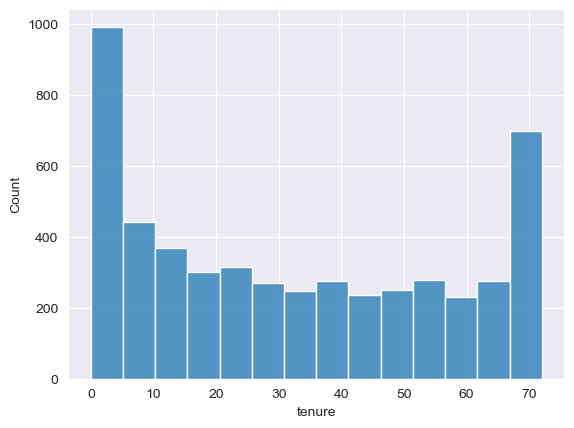

In [16]:
# Analisando a Distribuição de tenure:
sns.set_style("darkgrid")
plt.tight_layout()
sns.histplot(data=df_clientes, x='tenure')

Podemos perceber que temos muitos cliente com pouco tempo de empresa (10 meses ou menos). Esse pico entre 70 e 72 (o máximo que observamos no describe) pode ter acontecido pelo fato de termos clientes com mais de 72 meses de casa, porém não foi contabilizado adequadamente, ou seja, > 72 foi colocado no banco de dados como = 72.

Porém essa é apenas uma hipótese.

In [17]:
# Verificando:
len(df_clientes.loc[df_clientes['tenure'] == 72])

259

In [18]:
# Calculando a porcentagem de clientes com 6 anos de casa (72 meses):

porcentagem = (259/5634)*100
print(porcentagem)

4.5970891018814335


Quase 4.6% dos clientes possui exatamente 6 anos de casa? Talvez, porém é mais provável que nossa hipótese esteja certa.

In [19]:
# Vamos verificar os valores 0 meses de tenure:
len(df_clientes.loc[df_clientes['tenure'] == 0])

8

In [20]:
# Vamos verificar os valores baixos de tenure:
len(df_clientes.loc[df_clientes['tenure'] <= 5])

992

In [21]:
porcentagem = (992/5634)*100
print(porcentagem)

17.607383741569045


Temos aqui uma porcentagem considerável de clientes com 5 meses ou menos de casa.

In [22]:
# Mudando o padrão de Quartis para Decis utilizando o linspace que divide em espaços iguais um intervalo de números:
df_clientes.describe(percentiles=np.linspace(0, 1, 11))

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,5634.00,5173.00,5634.00,5626.00,5634.00
mean,0.16,32.33,64.63,2273.51,0.27
std,0.37,24.46,30.02,2258.38,0.44
min,0.00,0.00,18.25,18.80,0.00
0%,0.00,0.00,18.25,18.80,0.00
10%,0.00,2.00,20.05,85.50,0.00
20%,0.00,6.00,25.10,267.00,0.00
30%,0.00,12.00,45.80,550.98,0.00
40%,0.00,20.00,58.60,939.80,0.00
50%,0.00,29.00,70.25,1396.12,0.00


<Axes: xlabel='MonthlyCharges', ylabel='Count'>

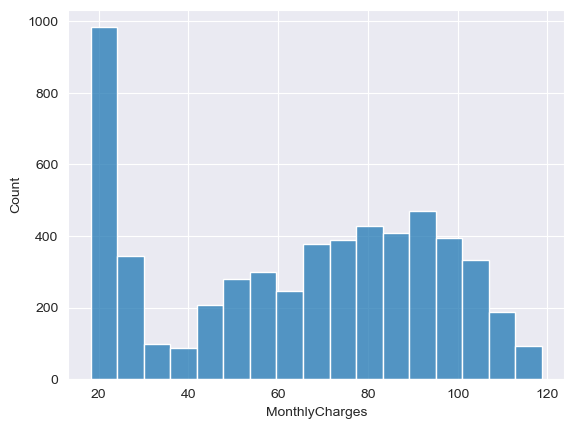

In [23]:
# Analisando a Distribuição das cobranças mensais:
sns.set_style("darkgrid")
plt.tight_layout()
sns.histplot(data=df_clientes, x='MonthlyCharges')

Temos uma distribuição diferente, com um pico de cobranças mensais baixas, seguido de uma distribuição mais "esperada" onde temos cobranças entre 40 e 110 bem distribuidas pelo número de clientes.

<Axes: xlabel='TotalCharges', ylabel='Count'>

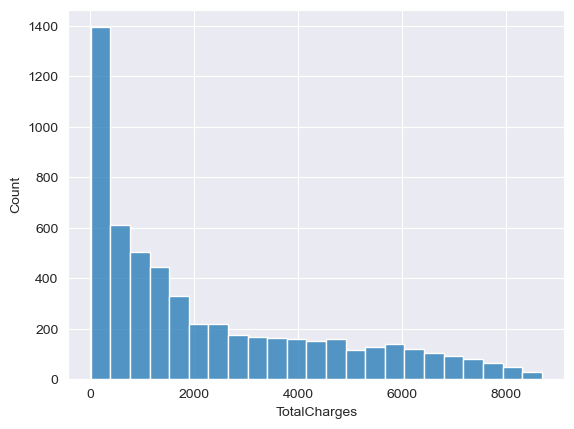

In [24]:
# Analisando a Distribuição das cobranças totais:
sns.set_style("darkgrid")
plt.tight_layout()
sns.histplot(data=df_clientes, x='TotalCharges')

Isso já era esperado, pois temos muitos clientes com pouco tempo de empresa (17% tem menos de 5 meses). Logo, o total de cobranças já feitas a esses clientes será baixo.

<Axes: xlabel='Churn', ylabel='count'>

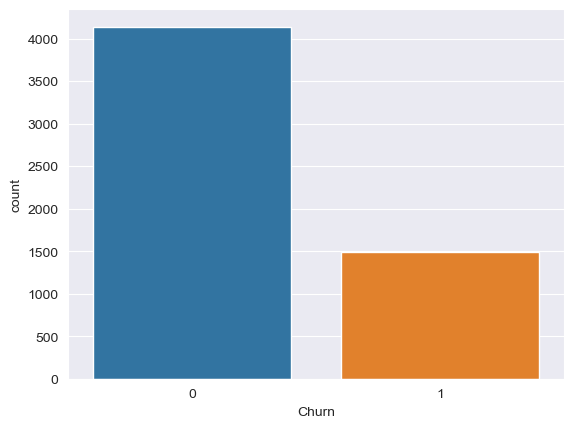

In [25]:
# Analisando a variável target, o churn:
sns.countplot(data=df_clientes, x='Churn')

A variável está um pouco desbalanceada, temos que nos atentar na escolha da métrica a ser utilizada.

In [26]:
# Avaliando o desbalanceamento:
len(df_clientes.loc[df_clientes['Churn'] == 0]), len(df_clientes.loc[df_clientes['Churn'] == 1])

(4139, 1495)

In [27]:
# Caso o modelo estime que todos os clientes não vão sair da empresa:
100* len(df_clientes.loc[df_clientes['Churn'] == 0]) / df_clientes.shape[0]

73.46467873624424

Isso nos diz que se a acurácia do nosso modelo for próxima de 73% ele foi fraco, pois até mesmo um chute de todos os cliente ficando na empresa seria uma estimativa melhor.

# <a>Relação entre as Features e a Variável Target</a>

Vamos analisar as dispersões das variáveis preditoras com o churn, e tentar encontrar possíveis relações entre as features com a target.

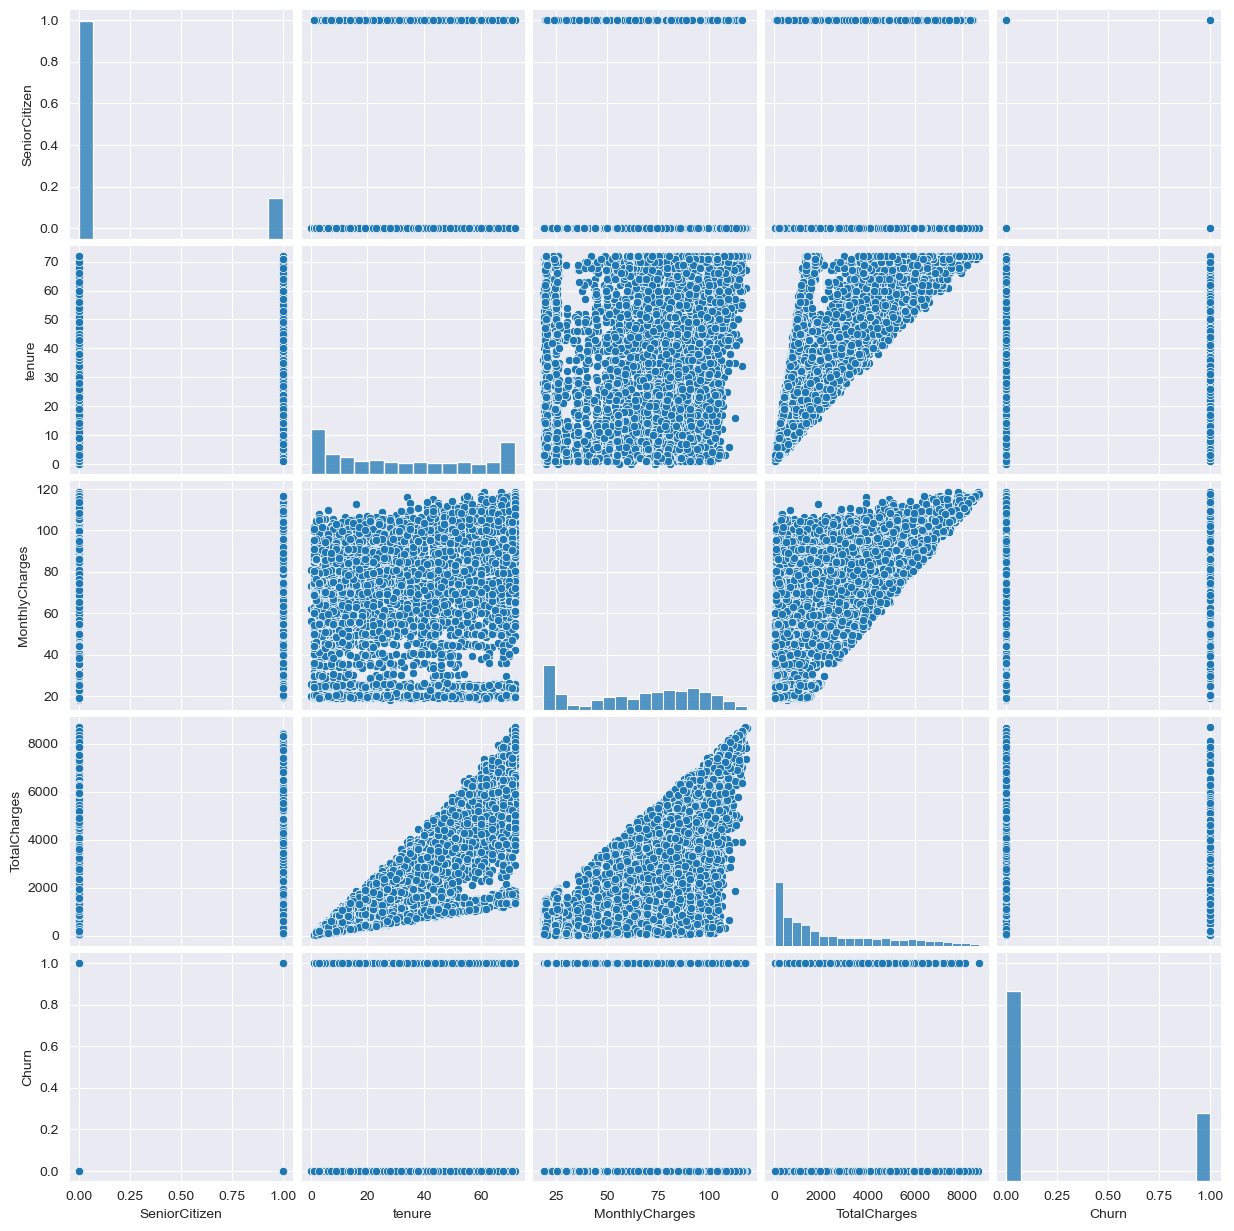

In [28]:
# Utilizando o pairplot:
sns.pairplot(data=df_clientes)

A única correlação perceptiva é o tenure com o total charges, o que já era esperado, já que quanto mais tempo de casa mais dinheiro ele deu para a companhia.

# <a>Codificação de variáveis categóricas</a>

Modelos de Machine Learning trabalham melhor com variáveis numéricas, e portanto precisamos codificar nossas features categóricas, tornando-as numéricas.

In [29]:
colunas_categoricas = [coluna for coluna in df_clientes.columns if coluna not in df_clientes._get_numeric_data()]
colunas_categoricas

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [30]:
for coluna_categorica in colunas_categoricas:
    display(df_clientes[coluna_categorica].value_counts())

Male      2849
Female    2785
Name: gender, dtype: int64

No     2902
Yes    2732
Name: Partner, dtype: int64

No     3793
Yes    1623
Name: Dependents, dtype: int64

Yes    5082
No      552
Name: PhoneService, dtype: int64

No                  2692
Yes                 2390
No phone service     552
Name: MultipleLines, dtype: int64

Fiber optic    2451
DSL            1959
No             1224
Name: InternetService, dtype: int64

No                     2763
Yes                    1647
No internet service    1224
Name: OnlineSecurity, dtype: int64

No                     2488
Yes                    1922
No internet service    1224
Name: OnlineBackup, dtype: int64

No                     2480
Yes                    1930
No internet service    1224
Name: DeviceProtection, dtype: int64

No                     2793
Yes                    1617
No internet service    1224
Name: TechSupport, dtype: int64

No                     2240
Yes                    2170
No internet service    1224
Name: StreamingTV, dtype: int64

No                     2218
Yes                    2192
No internet service    1224
Name: StreamingMovies, dtype: int64

Month-to-month    3084
Two year          1358
One year          1192
Name: Contract, dtype: int64

Yes    3312
No     2322
Name: PaperlessBilling, dtype: int64

Electronic check             1887
Mailed check                 1272
Bank transfer (automatic)    1212
Credit card (automatic)      1164
Name: PaymentMethod, dtype: int64

In [31]:
# Mapeando as features binárias (gender, partner, dependents, phone service e paperless billing):
df_clientes['gender'] = df_clientes['gender'].map({'Female': 1, 'Male': 0})

colunas_binarias = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for coluna_binaria in colunas_binarias:
    df_clientes[coluna_binaria] = df_clientes[coluna_binaria].map({'Yes': 1, 'No': 0})

In [32]:
display(df_clientes['gender'].value_counts())

for colunas_binarias in colunas_binarias:
    display(df_clientes[colunas_binarias].value_counts())

0    2849
1    2785
Name: gender, dtype: int64

0    2902
1    2732
Name: Partner, dtype: int64

0.00    3793
1.00    1623
Name: Dependents, dtype: int64

1    5082
0     552
Name: PhoneService, dtype: int64

1    3312
0    2322
Name: PaperlessBilling, dtype: int64

A notação ficou diferente em Dependents porque existe Missing Data

In [33]:
# Verificando quais colunas ainda são categóricas:
colunas_categoricas = [coluna for coluna in df_clientes.columns if coluna not in df_clientes._get_numeric_data()]
colunas_categoricas

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [34]:
for coluna_categorica in colunas_categoricas:
    display(df_clientes[coluna_categorica].value_counts())

No                  2692
Yes                 2390
No phone service     552
Name: MultipleLines, dtype: int64

Fiber optic    2451
DSL            1959
No             1224
Name: InternetService, dtype: int64

No                     2763
Yes                    1647
No internet service    1224
Name: OnlineSecurity, dtype: int64

No                     2488
Yes                    1922
No internet service    1224
Name: OnlineBackup, dtype: int64

No                     2480
Yes                    1930
No internet service    1224
Name: DeviceProtection, dtype: int64

No                     2793
Yes                    1617
No internet service    1224
Name: TechSupport, dtype: int64

No                     2240
Yes                    2170
No internet service    1224
Name: StreamingTV, dtype: int64

No                     2218
Yes                    2192
No internet service    1224
Name: StreamingMovies, dtype: int64

Month-to-month    3084
Two year          1358
One year          1192
Name: Contract, dtype: int64

Electronic check             1887
Mailed check                 1272
Bank transfer (automatic)    1212
Credit card (automatic)      1164
Name: PaymentMethod, dtype: int64

6 features possuem as mesmas opções: yes, no e no internet service. Isso facilitará o mapeamento.

Contract tem uma ordem intríseca, e podemos considerar que InternetService e PaymentMethod também.

In [35]:
# Continuando a codificação:
df_clientes['Contract'] = df_clientes['Contract'].map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})
df_clientes['InternetService'] = df_clientes['InternetService'].map({'No': 0, 'DSL': 1, 'Fiber optic': 2})
df_clientes['PaymentMethod'] = df_clientes['PaymentMethod'].map({'Mailed check': 0,
                                                                'Electronic check': 1,
                                                                'Bank transfer (automatic)': 2,
                                                                'Credit card (automatic)': 3})
df_clientes.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
id,,,,,,,,,,,,,,,,,,,,
4030,1,0,0,0.00,56.00,0,No phone service,1,Yes,Yes,Yes,Yes,No,No,2,0,NaN,45.05,2560.10,0
6731,0,0,1,1.00,NaN,1,No,0,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,1,0,0.00,19.65,332.65,0
6479,1,0,1,0.00,60.00,1,Yes,2,No,Yes,Yes,Yes,Yes,Yes,2,1,3.00,110.80,6640.70,0
6861,1,0,0,0.00,37.00,1,Yes,2,No,Yes,Yes,No,Yes,Yes,0,1,2.00,101.90,3545.35,1
3266,0,0,1,1.00,29.00,1,No,2,No,No,No,No,No,No,0,1,1.00,70.75,1974.80,1


In [36]:
# Para as demais features, que são nominais, utilizaremos o One Hot Encoding para codificá-las:
from sklearn.preprocessing import OneHotEncoder

In [37]:
colunas_categoricas = [coluna for coluna in df_clientes.columns if coluna not in df_clientes._get_numeric_data()]
colunas_categoricas

['MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [38]:
ohe = OneHotEncoder(sparse=False, drop='first')
df_ohe_transformadas = ohe.fit_transform(df_clientes[colunas_categoricas])
ohe.categories_

C:\Users\rhyan\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[array(['No', 'No phone service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object)]

In [39]:
ohe.get_feature_names_out()

array(['MultipleLines_No phone service', 'MultipleLines_Yes',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes'],
      dtype=object)

In [40]:
df_ohe_transformadas

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [41]:
# Transformando o array numpy em colunas:
df_ohe_transformadas = pd.DataFrame(data=df_ohe_transformadas, columns=ohe.get_feature_names_out(), index=df_clientes.index)
df_ohe_transformadas.head()

,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
id,,,,,,,,,,,,,,
4030,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00
6731,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
6479,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00
6861,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00
3266,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [42]:
df_ohe_transformadas.shape

(5634, 14)

In [43]:
# Unindo os DataFrames para criarmos nossa nova base de dados numéricos:
df_clientes = pd.concat([df_clientes, df_ohe_transformadas], axis=1)
df_clientes.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4030,1,0,0,0.00,56.00,0,No phone service,1,Yes,Yes,Yes,Yes,No,No,2,0,NaN,45.05,2560.10,0,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00
6731,0,0,1,1.00,NaN,1,No,0,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,1,0,0.00,19.65,332.65,0,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
6479,1,0,1,0.00,60.00,1,Yes,2,No,Yes,Yes,Yes,Yes,Yes,2,1,3.00,110.80,6640.70,0,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00
6861,1,0,0,0.00,37.00,1,Yes,2,No,Yes,Yes,No,Yes,Yes,0,1,2.00,101.90,3545.35,1,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00
3266,0,0,1,1.00,29.00,1,No,2,No,No,No,No,No,No,0,1,1.00,70.75,1974.80,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [44]:
# Terminada a codificação, precisamos remover as features categóricas:
df_clientes = df_clientes.drop(colunas_categoricas, axis=1)
df_clientes.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
id,,,,,,,,,,,,,,,,,,,,,,,,,,,
4030,1,0,0,0.00,56.00,0,1,2,0,NaN,45.05,2560.10,0,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00
6731,0,0,1,1.00,NaN,1,0,1,0,0.00,19.65,332.65,0,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
6479,1,0,1,0.00,60.00,1,2,2,1,3.00,110.80,6640.70,0,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00
6861,1,0,0,0.00,37.00,1,2,0,1,2.00,101.90,3545.35,1,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00
3266,0,0,1,1.00,29.00,1,2,0,1,1.00,70.75,1974.80,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [45]:
df_clientes.dtypes

gender                                    int64
SeniorCitizen                             int64
Partner                                   int64
Dependents                              float64
tenure                                  float64
PhoneService                              int64
InternetService                           int64
Contract                                  int64
PaperlessBilling                          int64
PaymentMethod                           float64
MonthlyCharges                          float64
TotalCharges                            float64
Churn                                     int64
MultipleLines_No phone service          float64
MultipleLines_Yes                       float64
OnlineSecurity_No internet service      float64
OnlineSecurity_Yes                      float64
OnlineBackup_No internet service        float64
OnlineBackup_Yes                        float64
DeviceProtection_No internet service    float64
DeviceProtection_Yes                    

Codificação finalizada, todas as features são numéricas. Estamos prontos para começar a modelagem!